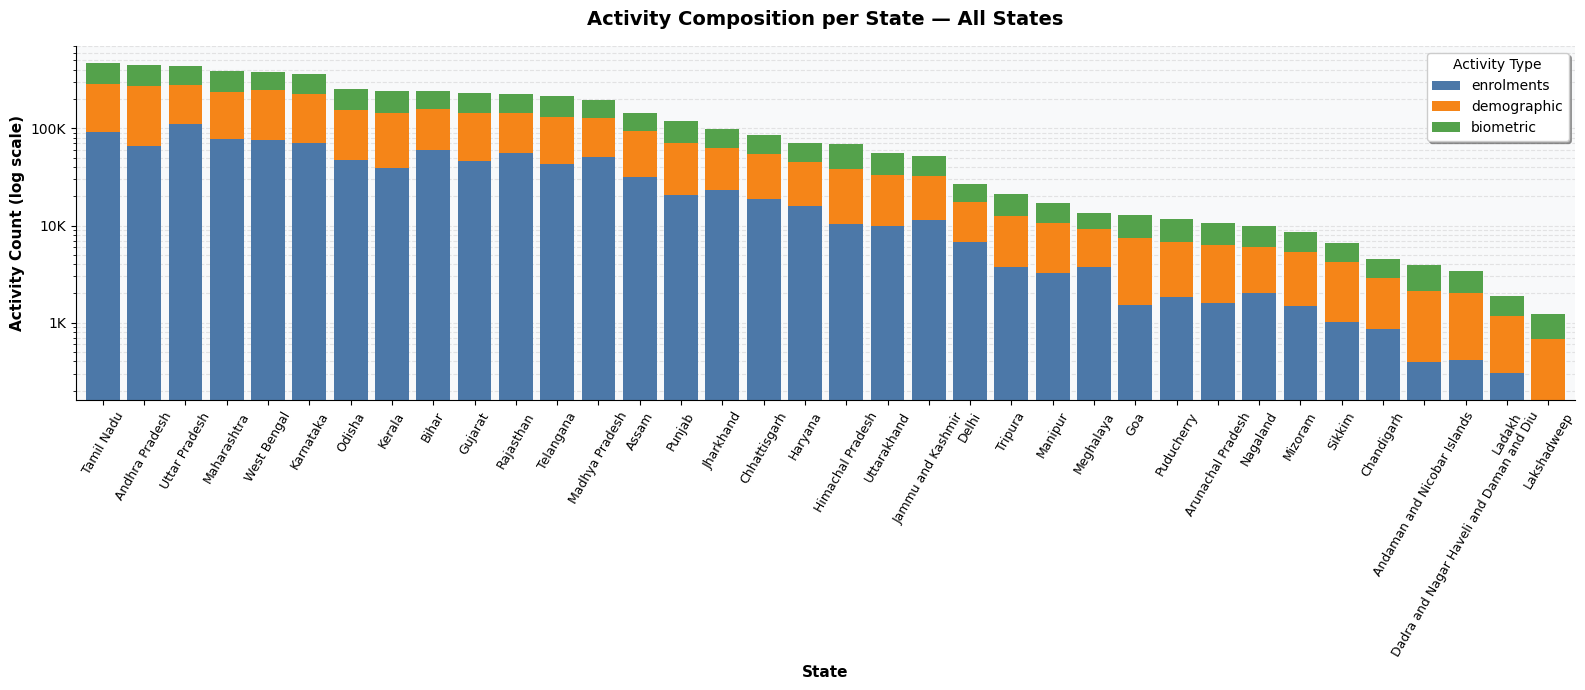

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")


enrolments=enrolment_df.groupby("state").size()
demographic=demographic_df.groupby("state").size()
biometric=biometric_df.groupby("state").size()

activity=pd.DataFrame({
    "enrolments":enrolments,
    "demographic":demographic,
    "biometric":biometric
}).fillna(0)


activity["total"]=activity.sum(axis=1)


activity_all = (
    activity
    .sort_values("total", ascending=False)
    .drop(columns="total")
)


colors = ["#4C78A8", "#F58518", "#54A24B"]

fig, ax = plt.subplots(figsize=(16, 7))

activity_all.plot(
    kind="bar",
    stacked=True,
    width=0.82,
    color=colors,
    ax=ax,
)


ax.set_yscale("log")


def format_millions(y, pos):
    if y >= 1_000_000:
        return f"{y/1_000_000:.1f}M"
    elif y >= 1_000:
        return f"{y/1_000:.0f}K"
    else:
        return f"{y:.0f}"

ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

ax.set_xlabel("State", fontsize=11, fontweight="bold")
ax.set_ylabel("Activity Count (log scale)", fontsize=11, fontweight="bold")
ax.set_title("Activity Composition per State — All States", fontsize=14, fontweight="bold", pad=15)
ax.tick_params(axis="x", rotation=60, labelsize=9)
ax.grid(axis="y", linestyle="--", alpha=0.3, which="both")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(title="Activity Type", frameon=True, shadow=True, fancybox=True)
ax.set_facecolor("#f8f9fa")
fig.patch.set_facecolor("white")
fig.tight_layout()
plt.show()
